 # ***Diabetes Detection System***
### Build a binary classification model that predicts whether a person has diabetes or not based on medical features.







# STEP 1 : Load the Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/2025-09-01T04-03-42.625Z-2025-07-04T13-24-57.561Z-diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("The length of the dataset : ", len(df))

The length of the dataset :  768


In [7]:
print("The coloums are : ", df.columns)
print("The shape of the dataset : ", df.shape)

The coloums are :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
The shape of the dataset :  (768, 9)


# STEP 2 : EDA.

## 2.1 : See the basic information we have.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


### 2.2 :  Check if has missing or null values are there.

In [10]:
print("\n Missing values are : \n", df.isnull().sum())


 Missing values are : 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


👉
There is no missing value found.

In [11]:
print("\n Class Distributions : \n", df['Outcome'].value_counts())


 Class Distributions : 
 Outcome
0    500
1    268
Name: count, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


✅ Here all data are numarical so we do not need to encoding on this dataset.

### Correlation heatmap

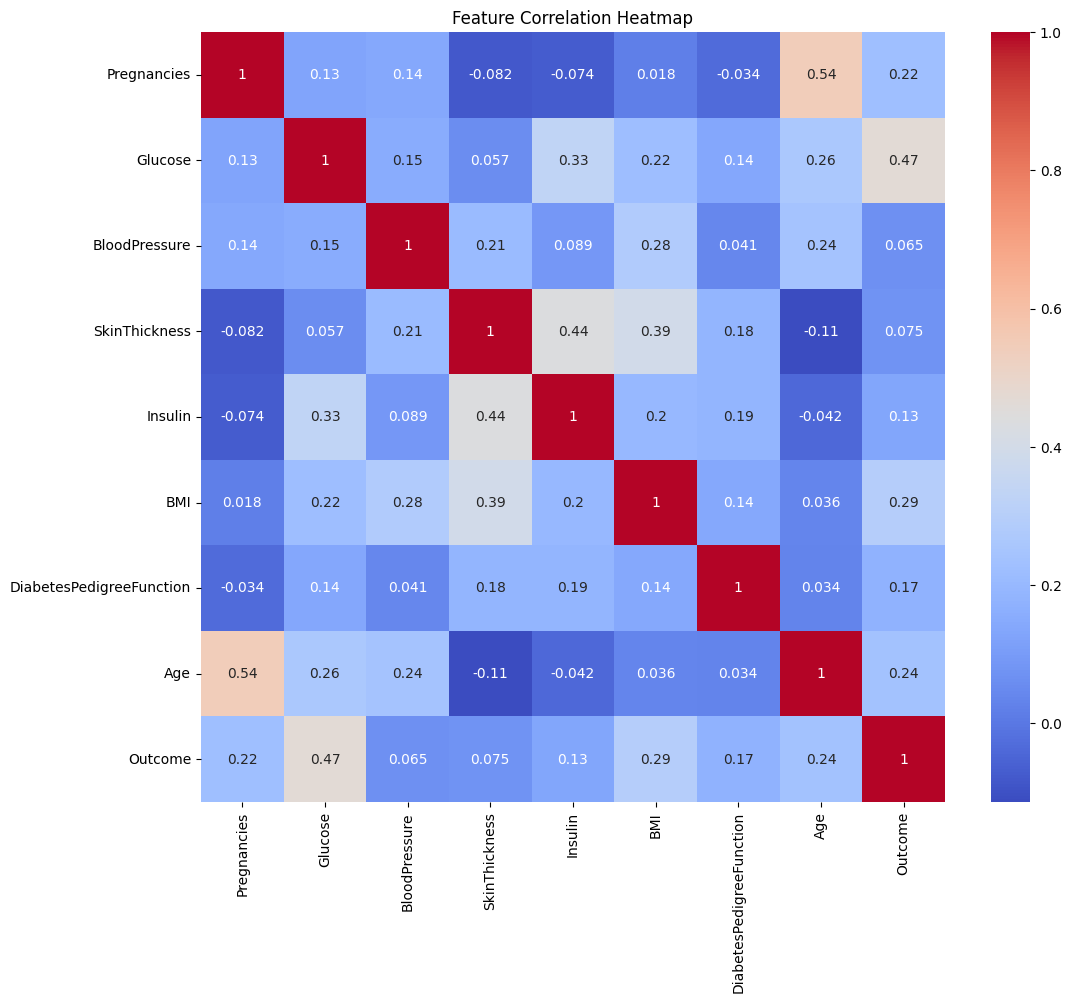

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Histograms for each feature

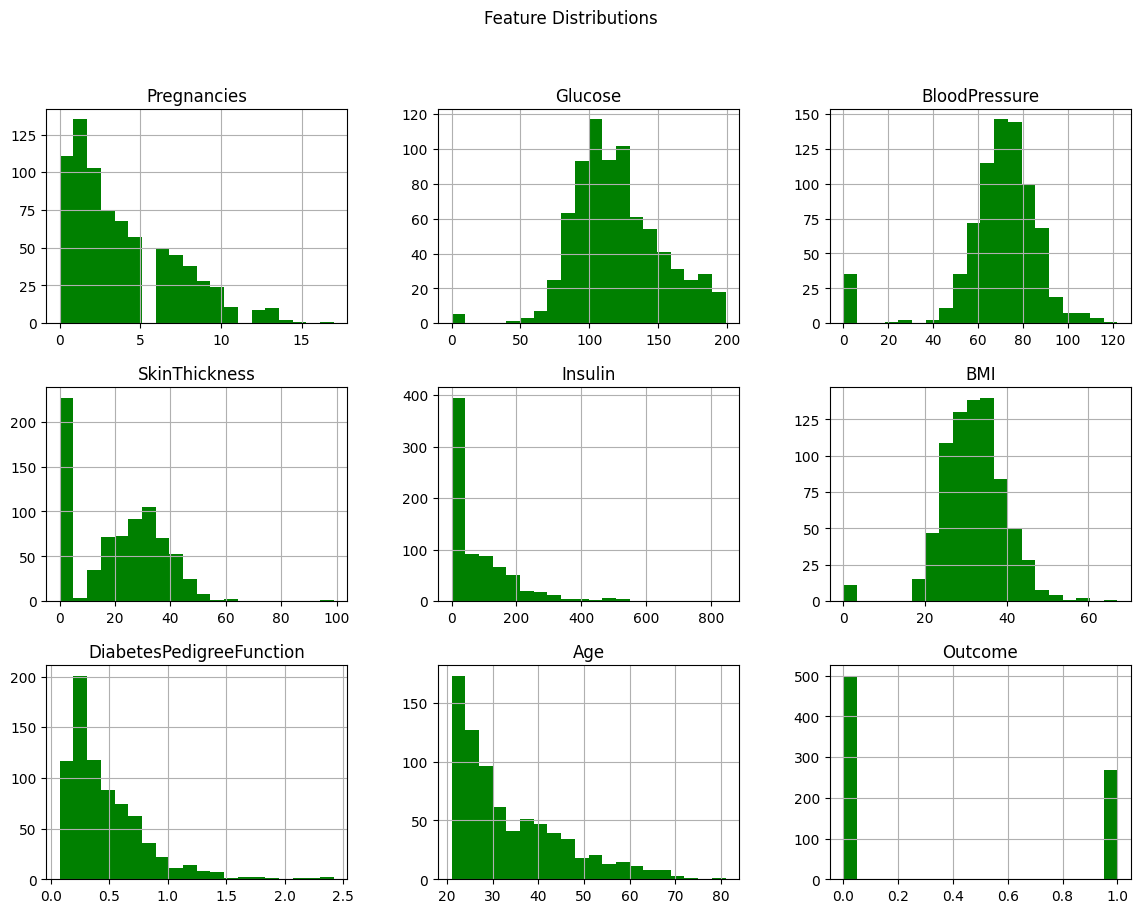

In [16]:
df.hist(bins=20, figsize=(14, 10), color='green')
plt.suptitle("Feature Distributions")
plt.show()


# STEP 3 : Preprocessing

### 3.1 : Replace physiologically impossible zeros with NaN

In [17]:
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_as_missing:
    df[col] = df[col].replace(0, np.nan)

print("\nMissing after cleaning zeros:\n", df.isnull().sum())



Missing after cleaning zeros:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 3.2 : Replace physiologically impossible zeros with NaN


> using Median imputation



In [19]:
from sklearn.impute import SimpleImputer


In [20]:
imputer = SimpleImputer(strategy="median")
df[zero_as_missing] = imputer.fit_transform(df[zero_as_missing])

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### 3.3 Separate features and labels

In [23]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# STEP 4 : Split Train-Test.

### Split the traing data on 80% and rest for test.

In [24]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (614, 8) Test size: (154, 8)


# STEP 5 : Features Scaling

### 5.1 :  scaling only to numeric features.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
print("\nShapes after split and scaling:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Shapes after split and scaling:
X_train: (614, 8) X_test: (154, 8)
y_train: (614,) y_test: (154,)


# STEP 6 : Model Selection

### 6.1 : Logistic Regression.

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_curve, auc)

### 6.2 : Train the model.

In [38]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression()

### 6.3 : predict.

In [40]:
logistic_reg_pred = logistic_reg.predict(X_test_scaled)

In [43]:
print(logistic_reg_pred)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0]


### Check the Accuracy.

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7077922077922078


In [46]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



### 6.4 : KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

####  6.5 : Train on KNN.

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 6.6 : Predict.

In [49]:
knn_pred = knn.predict(X_test_scaled)

In [50]:
print(knn_pred)

[1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 0]


### 6.7 : Accuracy.

In [51]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.7532467532467533


In [64]:
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, knn_pred))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



### 6.8 : Decission tree classifire.

In [53]:
from sklearn.tree import DecisionTreeClassifier

### 6.9 : train on decission tree.

In [54]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### 6.10 : Predict.

In [55]:
dec_pred = dec_tree.predict(X_test_scaled)

In [56]:
print(dec_pred)

[1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]


### 6.11 : accuracy.

In [57]:
dec_accuracy = accuracy_score(y_test, dec_pred)
print("Accuracy:", dec_accuracy)

Accuracy: 0.6688311688311688


In [63]:
print("\nClassification Report - Decision Tree")
print(classification_report(y_test, dec_pred))


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



### 6.12 : Random forest.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [60]:
print(f"Random Forest: {acc_rf:.3f}")

Random Forest: 0.740


In [61]:
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



# STEP 7: Model Evaluation.

### 7.1 : Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix


In [67]:
models = {
    "Logistic Regression": logistic_reg_pred,
    "KNN": knn_pred,
    "Decision Tree": dec_pred,
    "Random Forest": y_pred_rf
}



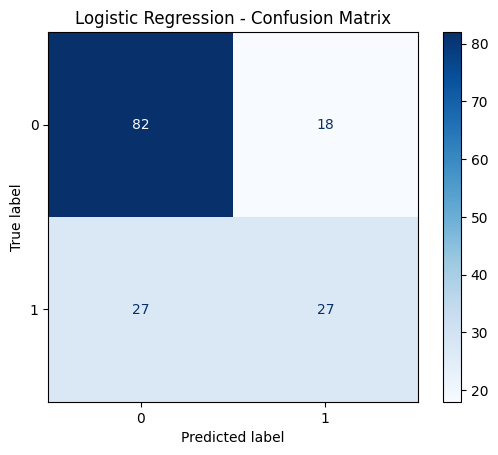

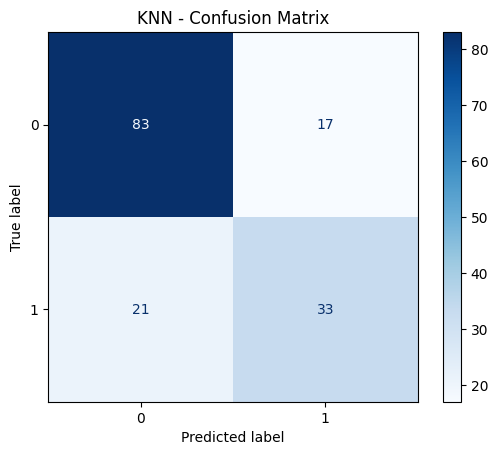

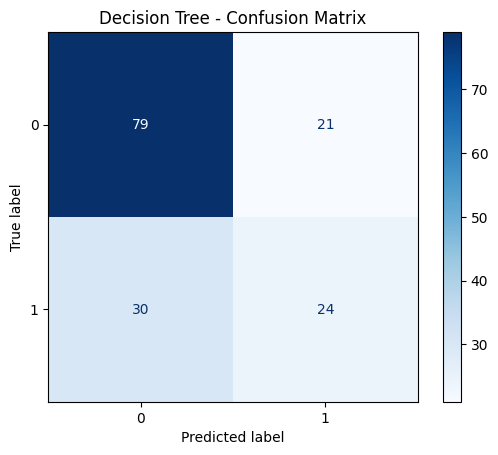

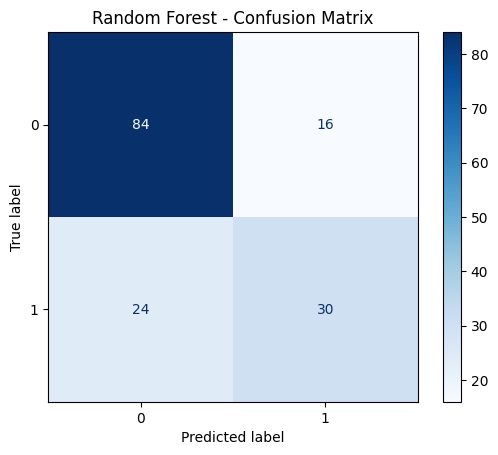

In [68]:
for name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

### 7.2 : ROC Curve & AUC

In [72]:
roc_curves = []
models_prob = {
    "Logistic Regression": logistic_reg.predict_proba(X_test_scaled)[:, 1],
    "KNN": knn.predict_proba(X_test_scaled)[:, 1],
    "Decision Tree": dec_tree.predict_proba(X_test_scaled)[:, 1],
    "Random Forest": rf.predict_proba(X_test)[:, 1]
}

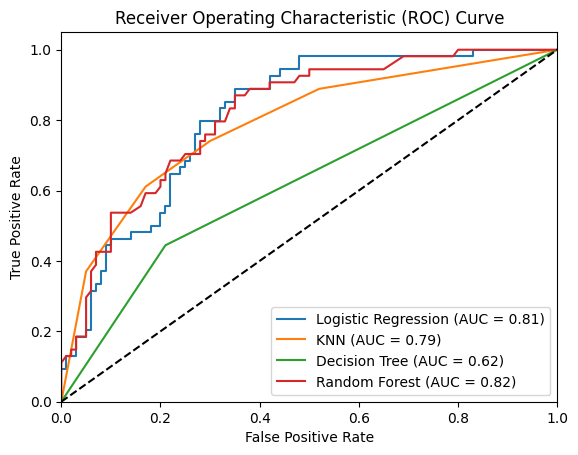

In [73]:
for name, y_prob in models_prob.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves.append((name, fpr, tpr, roc_auc))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 7.3 : Save all metrics

In [76]:
from sklearn.metrics import classification_report

In [77]:
metrics_table = []

models_pred = {
    "Logistic Regression": logistic_reg_pred,
    "KNN": knn_pred,
    "Decision Tree": dec_pred,
    "Random Forest": y_pred_rf
}

In [80]:
for name, y_pred in models_pred.items():
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = next((item[3] for item in roc_curves if item[0] == name), None)

    metrics_table.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "AUC": roc_auc
    })

metrics_df = pd.DataFrame(metrics_table)
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.707792,0.600000,0.500000,0.545455,0.812963
1,KNN,0.753247,0.660000,0.611111,0.634615,0.788611
2,Decision Tree,0.668831,0.533333,0.444444,0.484848,0.617222
3,Random Forest,0.740260,0.652174,0.555556,0.600000,0.816111
4,Logistic Regression,0.707792,0.600000,0.500000,0.545455,0.812963
5,KNN,0.753247,0.660000,0.611111,0.634615,0.788611
6,Decision Tree,0.668831,0.533333,0.444444,0.484848,0.617222
7,Random Forest,0.740260,0.652174,0.555556,0.600000,0.816111
8,Logistic Regression,0.707792,0.600000,0.500000,0.545455,0.812963
9,KNN,0.753247,0.660000,0.611111,0.634615,0.788611


# STEP 8 : Accuracy bar plot

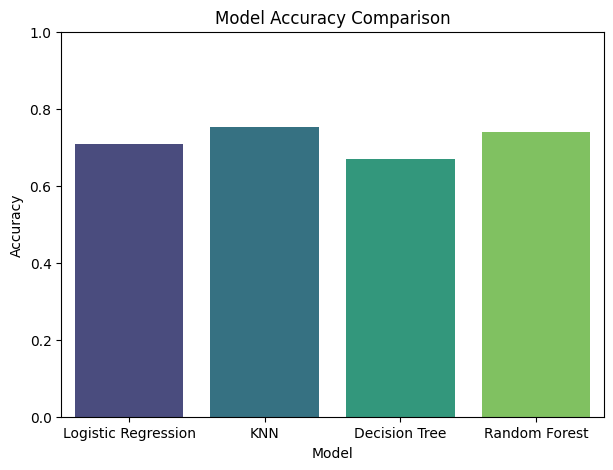

In [83]:
plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis", hue="Model", legend=False)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.show()